In [1]:
import __init__
import os
import ast  # for safely evaluating string representations of lists
from utils import comp_metrics, get_callbacks
from pathlib import Path
import tensorflow as tf
from data import load_data
from utils import comp_metrics, describe_model_architecture
import numpy as np
import json

In [2]:
version = 'v3'
dir_path = '.'
data_path = str(Path(dir_path) /  'input/stocks_step4.csv')
output_path = str(Path(dir_path) /  f'output/{version}')
model_path = str(Path(output_path) /  'model')

In [3]:
# Daten laden
td, vd = load_data(data_path)

In [4]:
# Load the saved model
loaded_model = tf.keras.models.load_model(model_path)

In [5]:
# Print layer details
print(json.dumps(describe_model_architecture(loaded_model), indent=2))

[
  {
    "name": "lstm_2",
    "type": "LSTM",
    "units": 128
  },
  {
    "name": "dropout_2",
    "type": "Dropout",
    "dropout_rate": 0.2
  },
  {
    "name": "lstm_3",
    "type": "LSTM",
    "units": 64
  },
  {
    "name": "dropout_3",
    "type": "Dropout",
    "dropout_rate": 0.4
  },
  {
    "name": "dense_2",
    "type": "Dense",
    "units": 32
  },
  {
    "name": "dense_3",
    "type": "Dense",
    "units": 1
  }
]


Predicting AAPL...
Metrics for AAPL
Mean Absolute Error (MAE): 1.358357548713684
Mean Squared Error (MSE): 3.404698610305786
Accuracy: 98.66%


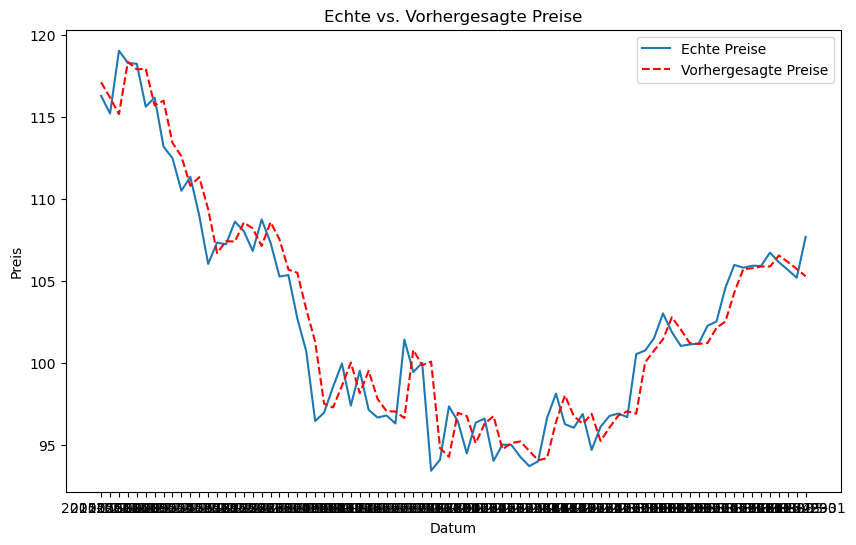

Predicting AMZN...
Metrics for AMZN
Mean Absolute Error (MAE): 10.486055374145508
Mean Squared Error (MSE): 222.0783233642578
Accuracy: 98.21%


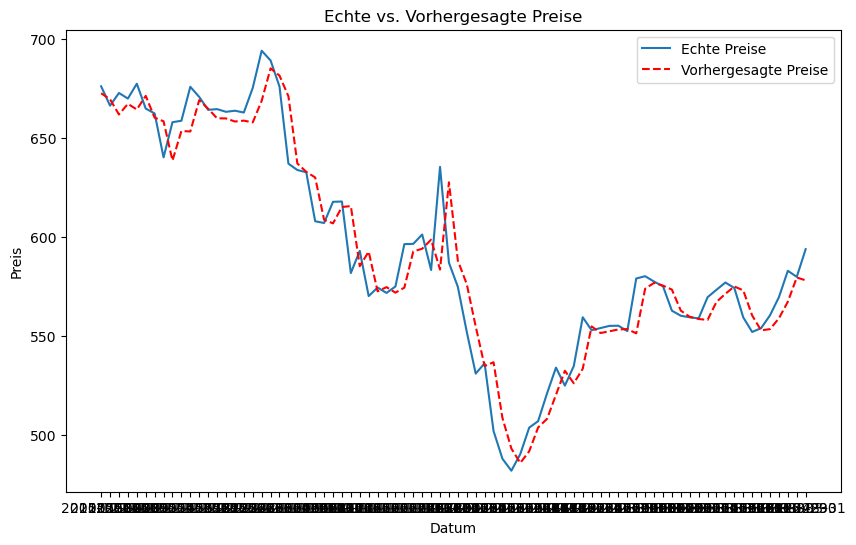

Predicting CSCO...
Metrics for CSCO
Mean Absolute Error (MAE): 0.3588557541370392
Mean Squared Error (MSE): 0.22867850959300995
Accuracy: 98.59%


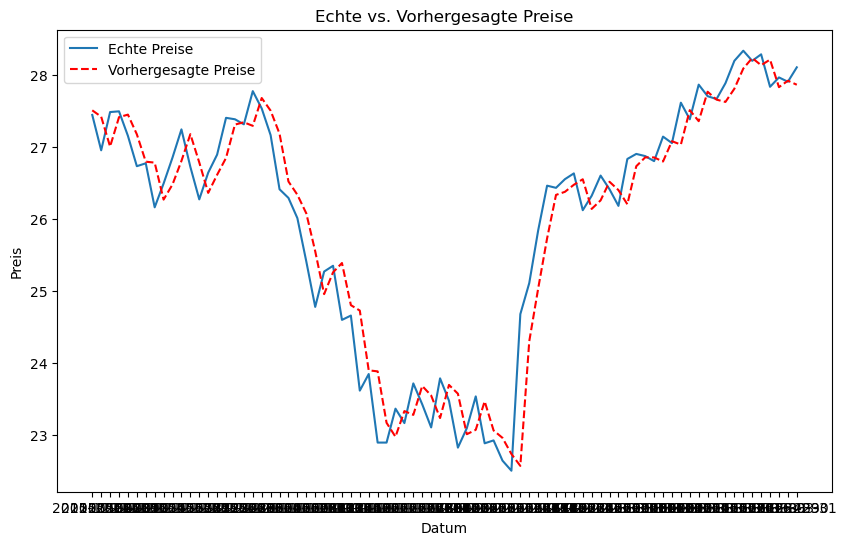

Predicting FB...
Metrics for FB
Mean Absolute Error (MAE): 1.753190279006958
Mean Squared Error (MSE): 6.745309352874756
Accuracy: 98.34%


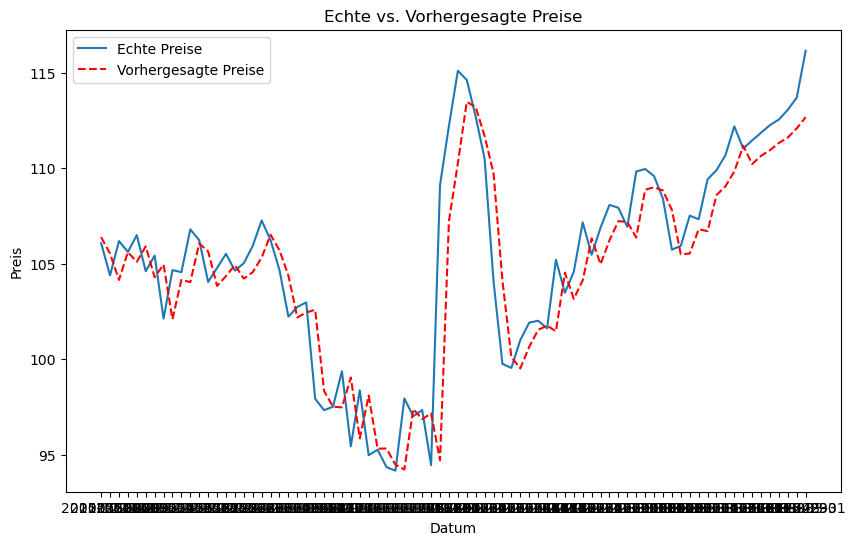

Predicting GOOG...
Metrics for GOOG
Mean Absolute Error (MAE): 8.769086837768555
Mean Squared Error (MSE): 130.80844116210938
Accuracy: 98.79%


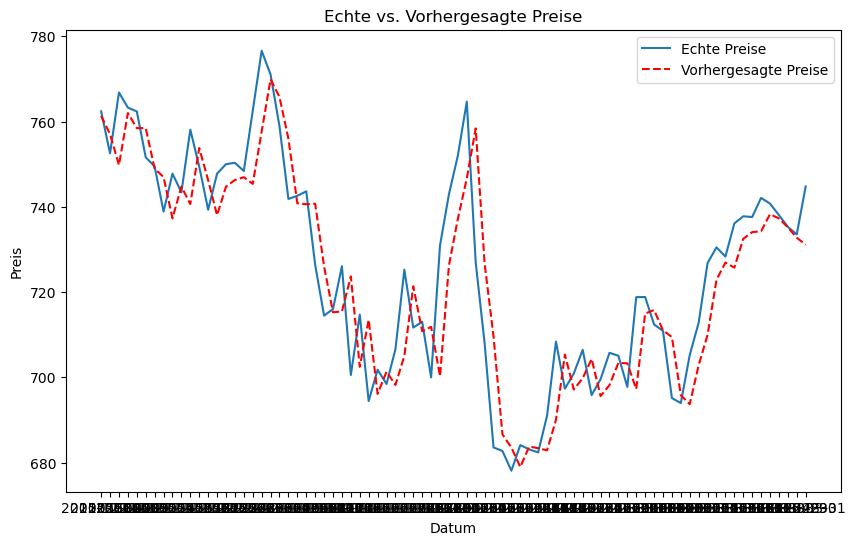

Predicting INTC...
Metrics for INTC
Mean Absolute Error (MAE): 0.4154137670993805
Mean Squared Error (MSE): 0.3286682963371277
Accuracy: 98.68%


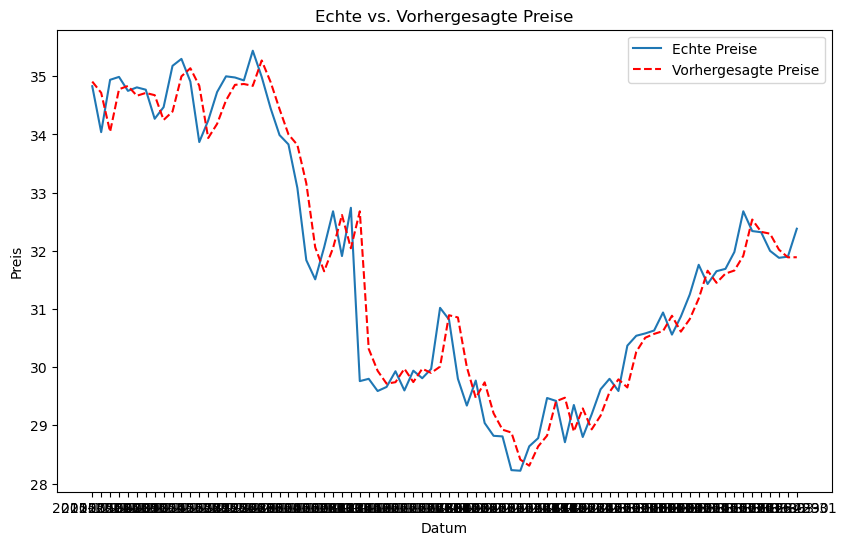

Predicting KO...
Metrics for KO
Mean Absolute Error (MAE): 0.31463557481765747
Mean Squared Error (MSE): 0.16109368205070496
Accuracy: 99.27%


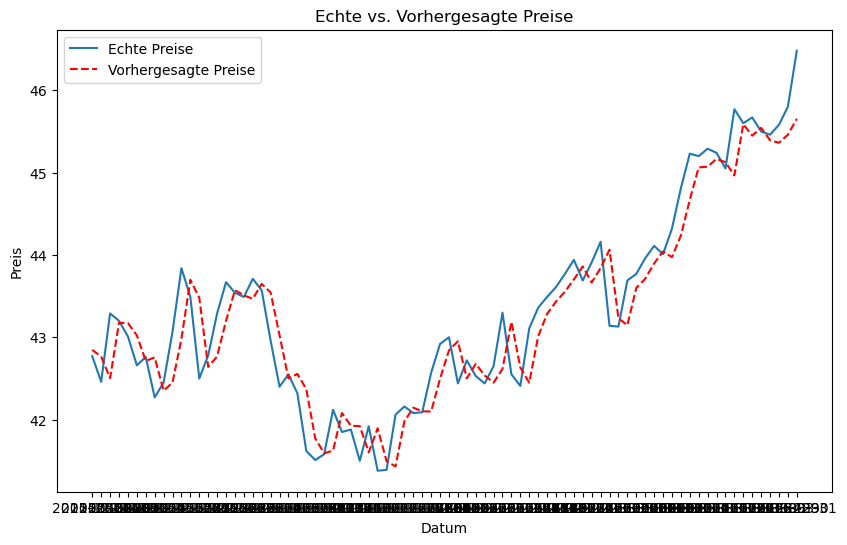

Predicting MA...
Metrics for MA
Mean Absolute Error (MAE): 1.197505235671997
Mean Squared Error (MSE): 2.4112563133239746
Accuracy: 98.67%


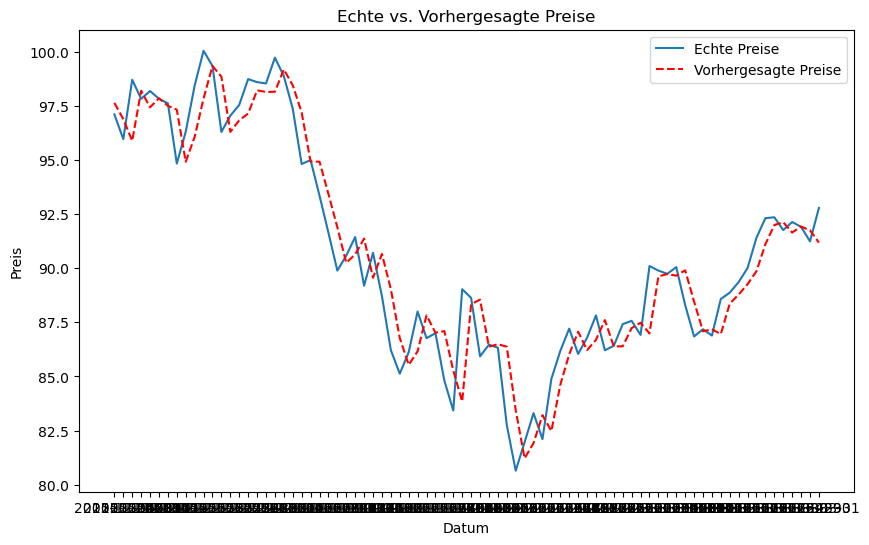

Predicting MSFT...
Metrics for MSFT
Mean Absolute Error (MAE): 0.7293332815170288
Mean Squared Error (MSE): 0.8401500582695007
Accuracy: 98.63%


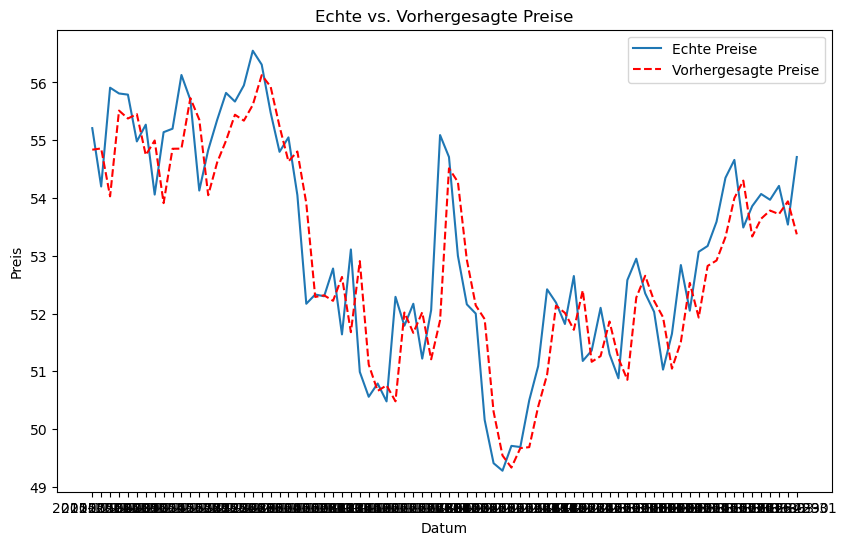

Predicting ORCL...
Metrics for ORCL
Mean Absolute Error (MAE): 0.4576122760772705
Mean Squared Error (MSE): 0.3547515869140625
Accuracy: 98.76%


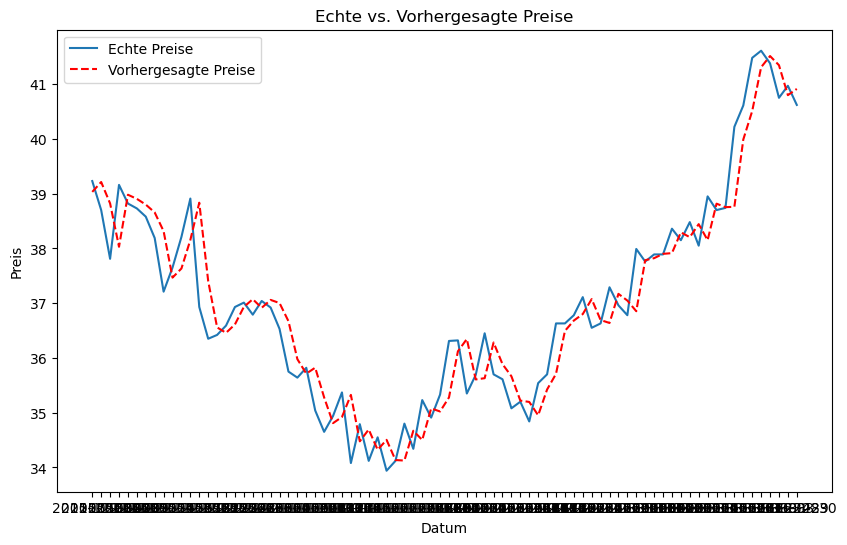

In [ ]:
for i in range(len(vd)):
    stock_vd = vd[i]
    scaler = stock_vd['scaler']
    stock_name = stock_vd['stock']
    df = stock_vd['df']
    
    X = []
    y = []
    for i in range(len(stock_vd['val_data'])):
        data = stock_vd['val_data'][i]
        X.append(data[0])
        y.append(data[1])
        
    X = np.array(X)
    y = np.array(y)
    
    print(f'Predicting {stock_name}...')
    y_pred = loaded_model.predict(X)
    print(f'Metrics for {stock_name}')
    comp_metrics(scaler, y, y_pred, df)